# Actividad 11

Joel Fayam Rivera Peña

2076323  Grupo: 42

Estadistica Aplicada

In [91]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
#Librerias especiales
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

In [93]:
datos=pd.read_excel('IMCMI_SA.xlsx')

In [94]:
datos.head()

,Periodos,IMCMI_SA
0,2020/01,101.478178
1,2020/02,101.156717
2,2020/03,94.766375
3,2020/04,77.549561
4,2020/05,76.350370


Elegimos un periodo de 2020 a 2023 dado que si consultamos la base de datos del INEGI observamos que para abril del 2020 hay una picada y posteriormente mantiene una tendencia creciente, por lo que para continuar con la tendencia y verificar que la picada no influya en el pronóstico tomaremos a partir de aquel dato.

In [95]:
datos.dtypes

Periodos     object
IMCMI_SA    float64
dtype: object

In [96]:
datos['Periodos']=pd.to_datetime(datos['Periodos'],format='%Y/%m')
datos=datos.set_index('Periodos')
datos=datos.asfreq('MS')

In [97]:
datos.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='Periodos', freq='MS')

In [98]:
datos.isnull().sum()

IMCMI_SA    0
dtype: int64

In [99]:
datos=datos.iloc[4:]

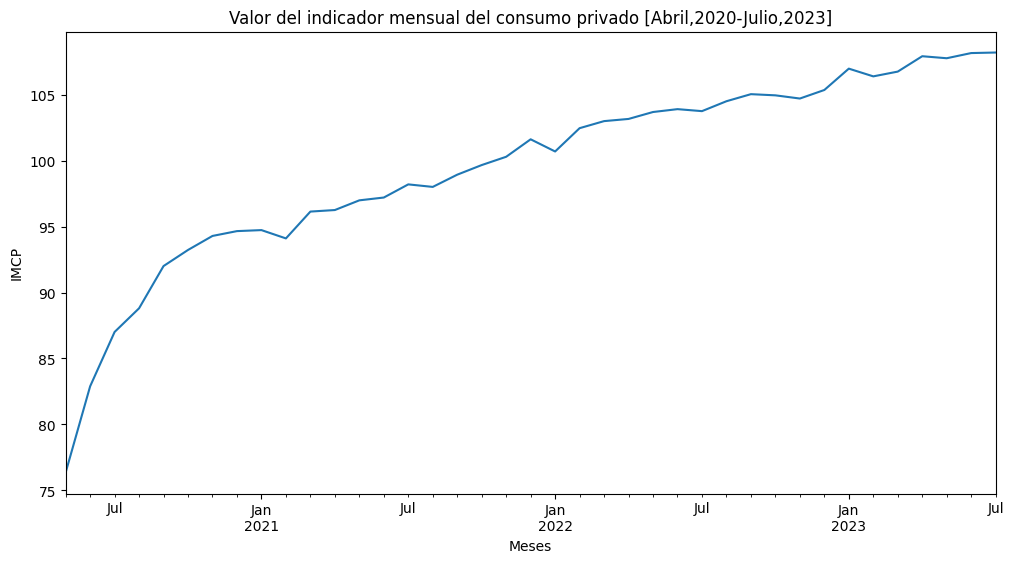

In [100]:
datos['IMCMI_SA'].plot(figsize=(12,6))
plt.title('Valor del indicador mensual del consumo privado [Abril,2020-Julio,2023]')
plt.xlabel('Meses')
plt.ylabel('IMCP')
plt.show()

In [101]:
# Prueba de raíz unitaria
prueba=adfuller(datos['IMCMI_SA'])
pvalue=prueba[1]
pvalue

0.31999765529492863

Dado que contamos con un p-value mayor a 0.05, no se rechaza Ho y decimos que la serie no es estacionaria.

In [102]:
datos['1ras_dif']=datos['IMCMI_SA'].diff()

In [103]:
prueba2=adfuller(datos['1ras_dif'].dropna())
pvalue2=prueba2[1]
pvalue2

1.2360066977538864e-07

Dado que contamos con un p-value menor a 0.05, rechazamos Ho y decimos que la serie es estacionaria

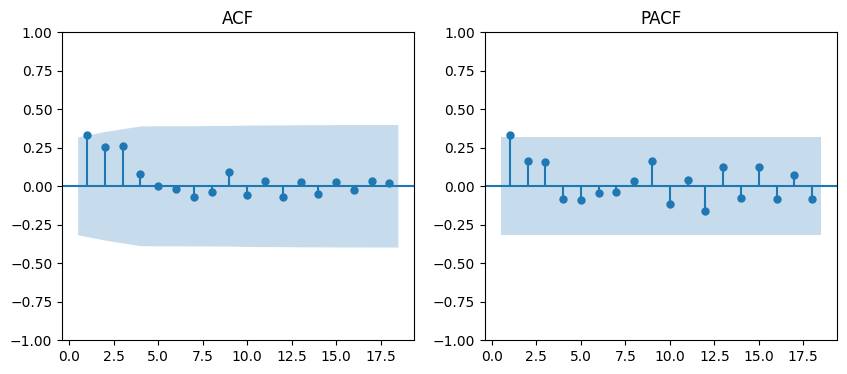

In [104]:
## Gráficas de autocorrelación
ig,ax=plt.subplots(1,2,figsize=(10,4))
## 1
plot_acf(datos['1ras_dif'].dropna(),zero=False,lags=18,ax=ax[0],title='ACF')
ax[0].set_ylim(-1,1)
## 2
plot_pacf(datos['1ras_dif'].dropna(),zero=False,lags=18,ax=ax[1],title='PACF')
ax[1].set_ylim(-1,1)
plt.show()

El modelo no cuenta con un componente estacional

In [105]:
import pmdarima as pm

In [106]:
pm.auto_arima(datos['IMCMI_SA'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,information_criterion='aic')

ARIMA(order=(1, 2, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [107]:
pm.auto_arima(datos['IMCMI_SA'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,information_criterion='bic')

ARIMA(order=(1, 2, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [108]:
pm.auto_arima(datos['IMCMI_SA'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,information_criterion='hqic')

ARIMA(order=(1, 2, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [109]:
pm.auto_arima(datos['IMCMI_SA'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,information_criterion='oob')

c:\Users\jfrp0\AppData\Local\Programs\Python\Python312\Lib\site-packages\pmdarima\arima\_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


ARIMA(order=(1, 2, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [110]:
modelo=ARIMA(datos['IMCMI_SA'],order=(1,2,2))
resultados=modelo.fit()
print(resultados.summary())

                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                   39
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -51.888
Date:                Wed, 01 Nov 2023   AIC                            111.777
Time:                        21:33:50   BIC                            118.220
Sample:                    05-01-2020   HQIC                           114.048
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6377      0.174      3.670      0.000       0.297       0.978
ma.L1         -1.3405      0.222     -6.048      0.000      -1.775      -0.906
ma.L2          0.8699      0.215      4.045      0.0

Observmaos que todos los modelos nos entregan el mismo modelo ARIMA(1,2,2) con un AIC de 111.777 y un BIC de 118.220, por lo que lo compararemos con otros modelos para observar cuál sería mejor.

In [ ]:
ic={}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo=ARIMA(datos['1ras_dif'].dropna(),order=(ar,0,ma))
        resultado=modelo.fit()
        ic[(ar,ma)]=[resultado.aic,resultado.bic]
ic=pd.DataFrame(ic,index=['AIC','BIC']).T
ic.index=ic.index.set_names(['AR','MA'])

In [112]:
ic.sort_values('AIC',).head(1)

,,AIC,BIC
AR,MA,,
1,3,119.68036,129.505877


In [113]:
ic.sort_values('BIC',).head(1)

,,AIC,BIC
AR,MA,,
1,3,119.68036,129.505877


In [114]:
arima2=ARIMA(datos['IMCMI_SA'],order=(1,1,3))
results=arima2.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                   39
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 -54.499
Date:                Wed, 01 Nov 2023   AIC                            118.997
Time:                        21:33:58   BIC                            127.185
Sample:                    05-01-2020   HQIC                           121.910
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9490      0.029     32.674      0.000       0.892       1.006
ma.L1         -0.7243      0.228     -3.182      0.001      -1.171      -0.278
ma.L2          0.3584      0.281      1.275      0.2

c:\Users\jfrp0\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jfrp0\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Guardamos ambos reportes y observamos cual consideramos (de forma gráfica) que tiene un mejor pronóstico

In [115]:
datos['ARIMA']=resultados.predict()
datos['ARIMA'][0]=datos['IMCMI_SA'][0]

C:\Users\jfrp0\AppData\Local\Temp\ipykernel_81152\2315374658.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  datos['ARIMA'][0]=datos['IMCMI_SA'][0]
C:\Users\jfrp0\AppData\Local\Temp\ipykernel_81152\2315374658.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  datos['ARIMA'][0]=datos['IMCMI_SA'][0]


In [116]:
datos['ARIMA2']=results.predict()
datos['ARIMA2'][0]=datos['IMCMI_SA'][0]

C:\Users\jfrp0\AppData\Local\Temp\ipykernel_81152\3732255723.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  datos['ARIMA2'][0]=datos['IMCMI_SA'][0]
C:\Users\jfrp0\AppData\Local\Temp\ipykernel_81152\3732255723.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  datos['ARIMA2'][0]=datos['IMCMI_SA'][0]


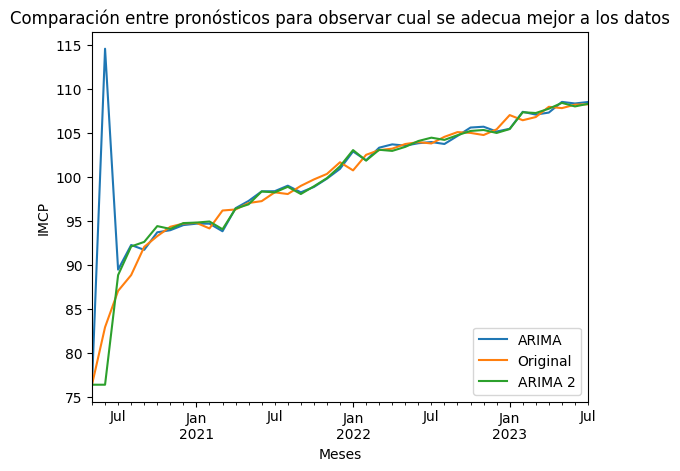

In [117]:
datos['ARIMA'].plot(label='ARIMA')
datos['IMCMI_SA'].plot(label='Original')
datos['ARIMA2'].plot(label='ARIMA 2')
plt.legend()
plt.title('Comparación entre pronósticos para observar cual se adecua mejor a los datos')
plt.xlabel('Meses')
plt.ylabel('IMCP')
plt.show()

Elegiremos el modelo ARIMA2 (1,1,3) dado que nos ayudará a predecir más efectivo los proximos 3 periodos. A su vez, observamos que tiene un comportamiento más similar a la serie original

In [118]:
datos.tail(5)

,IMCMI_SA,1ras_dif,ARIMA,ARIMA2
Periodos,,,,
2023-03-01,106.762443,0.361856,107.040433,107.221571
2023-04-01,107.928291,1.165848,107.270563,107.709214
2023-05-01,107.775653,-0.152638,108.484626,108.372376
2023-06-01,108.168118,0.392465,108.302940,107.968866
2023-07-01,108.209387,0.041269,108.473029,108.265044


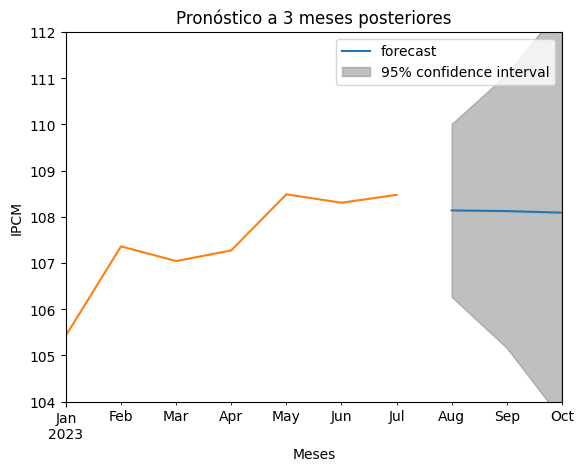

In [126]:
plot_predict(results,start='2023-08-01',end='2023-10-01')
datos['ARIMA'].plot()
plt.title('Pronóstico a 3 meses posteriores')
plt.xlabel('Meses')
plt.ylabel('IPCM')
plt.xlim('2023-01-01','2023-10-01')
plt.ylim(104,112)
plt.show()

Aunque observamos que nuestro pronóstico pareciese una linea recta, es necesario recordar que dado que estamos prediciendo un intervalo corto de tiempo, las variaciones aún no son tan grandes.

In [120]:
results.predict(start='2023-08-01',end='2023-10-01')

2023-08-01    108.136449
2023-09-01    108.122007
2023-10-01    108.087433
Freq: MS, Name: predicted_mean, dtype: float64

In [121]:
inicio='2023-08-01'
fin='2023-10-01'
pronostico=results.get_forecast(steps=3)
pronostico_promedio=pronostico.predicted_mean
pronostico_lim=pronostico.conf_int()
pronostico_valor=pronostico_promedio[inicio:fin]
pronostico_intervalos=pronostico_lim.loc[inicio:fin]

In [122]:
pro_datos=pd.DataFrame({'Pronóstico': pronostico_valor,
                        'Limite inferior': pronostico_intervalos.iloc[:,0],
                        'Limite superior': pronostico_intervalos.iloc[:,1]})

In [123]:
pro_datos

,Pronóstico,Limite inferior,Limite superior
2023-08-01,108.136449,106.262973,110.009924
2023-09-01,108.122007,105.159253,111.084761
2023-10-01,108.087433,103.603309,112.571556


In [124]:
print(f'Para agosto pronosticamos un IMPCI de: {pro_datos.iloc[0,0].round(2)}\npero puede estar entre {pro_datos.iloc[0,1].round(2)} y {pro_datos.iloc[0,2].round(2)} con un 95% de confianza')

Para agosto pronosticamos un IMPCI de: 108.14
pero puede estar entre 106.26 y 110.01 con un 95% de confianza
